Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2137.175, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2137.966, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2137.249, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2135.186, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2081.476, Time=1.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2067.468, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2109.082, Time=0.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2069.406, Time=1.59 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2071.199, Time=3.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2067.401, Time=1.67 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2089.775, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2074.180, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Evaluation:
RMSE: 1.44 °C
MAE: 1.20 °C


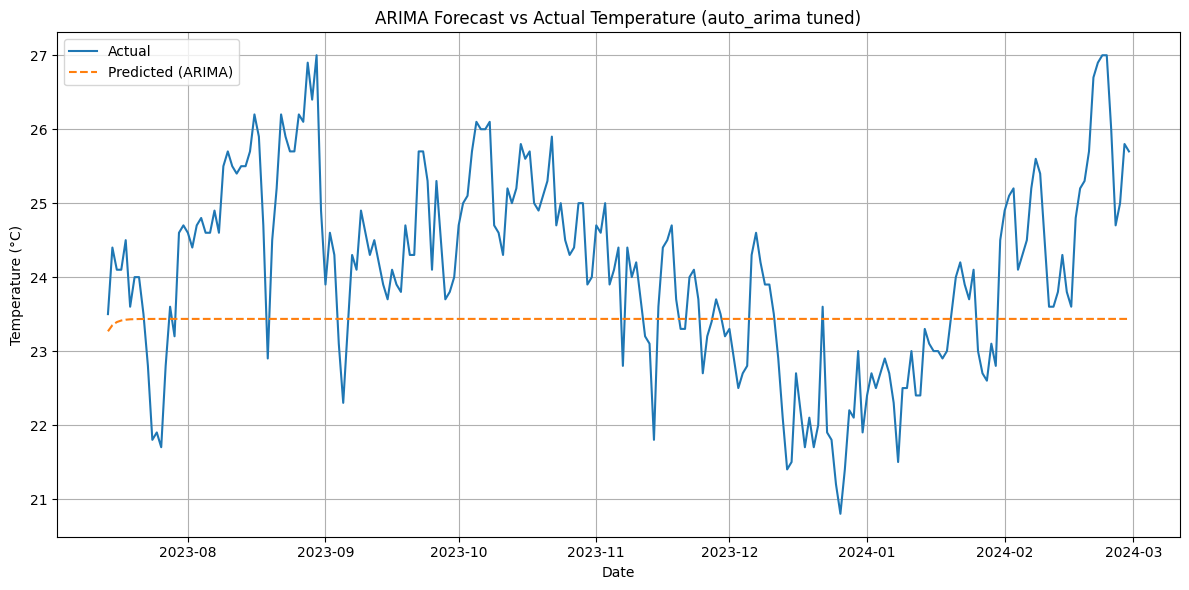

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\real time app\Bengaluru 2021-01-01 to 2024-02-29.csv")
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df['temp'] = df['temp'].interpolate()

# Train-test split
train_size = int(len(df) * 0.8)
train = df['temp'][:train_size]
test = df['temp'][train_size:]

# Use auto_arima to find best p, d, q
stepwise_model = auto_arima(train,
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

# Best model summary
print("Best ARIMA model order:", stepwise_model.order)
stepwise_model.summary()

# Fit the ARIMA model using statsmodels with best parameters
best_order = stepwise_model.order
model_arima = ARIMA(train, order=best_order)
model_fit_arima = model_arima.fit()

# Forecast
forecast = model_fit_arima.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"\nEvaluation:\nRMSE: {rmse:.2f} °C\nMAE: {mae:.2f} °C")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Predicted (ARIMA)', linestyle='--')
plt.title("ARIMA Forecast vs Actual Temperature (auto_arima tuned)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
